### **Perceptron from scratch**

We will implement perceptron from scratch in this notebook.

#### *Summary of perceptron components:* 

##### **1. Training Data** 
* Feature matrix: $\mathbf X_{n \times (m+1)} $ includes a dummy feature $x_0$ that is set to 1.

* Label vector: $\mathbf y_{n \times 1}$ 

**Note :**  Perceptron can solve only **binary classification** problems.


##### **2. Model** 

\begin{align} 
h_{\mathbf w} \colon y  &=& \text{sign}(\mathbf w^T \phi(\mathbf x)) 
\end{align}

\begin{align} 
\\&=& \text {sign}(z)  
\end{align}

where,
* $\mathbf w$ is a weight vector in $ {\Re}^{(m+1)} $

<!-- \begin{align}  
 \begin{cases} +1, \mbox { if $z$ $\ge$ 0}\\-1, \text {otherwise} (i.e. z < 0) \end{cases}  
\end{align}  -->

*   \begin{equation}
    \text {sign} (z)=
    \begin{cases}
      +1, \text { if $z$ $\ge$ 0}\\
      -1, \text {otherwise} (i.e. z < 0)
    \end{cases}
    \end{equation}


<!-- \begin{equation}  
\begin{align}
\text {sign} (z)=  
\\+1,\Aboxed{if $z$ $\ge$ 0}
\\-1, \text {otherwise} (i.e. z < 0)
\end{align}  
\end{equation} -->


##### **3. Loss function** 

\begin{align} 
\\J(\mathbf w) &=& \sum_{i=1}^{n}\text {max} (-h_{\mathbf w}(\mathbf x^{(i)})y^{(i)},0) 
\end{align}


##### **4. Optimization procedure (Perceptron update rule)** 
1. Initialize $\mathbf w^{(0)} =0$

2. For each training example $(\mathbf x^{(i)},y^{(i)})\colon $
    * $\hat y^{(i)}= \text{sign}(\mathbf w^T \phi(\mathbf x))$ [Calculate the ouput value] 
    
    * $\mathbf w^{(t+1}:= \mathbf w^{(t)}+ \alpha (y^{(i)} -\hat y^{(i)}) \phi(\mathbf x^{(i)})$ [Update the weights] 

Linear separable examples leads to convergence of the algorightm with zero training loss, else it oscillates. 

##### **5. Evaluation metrics** 
* Confusion matrix 
* Precision/Recall/F1 



#### **Implementation**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import itertools 
import functools

In [2]:
class Perceptron:
    """ Implements perceptron class.
    
    It uses the following class variables: 
    w: stores the final weight vector 
    w_all: stores all weight vector in training iterations.
    errors_all: stores all errors in training iterations.
    """ 

    def __init__(self):
        return 
    
    def predict(self,X):
        ''' Predicts labels for input feature matrix X.''' 

        z = X @ self.w 
        return np.where(z>=0 , 1, -1)
    

    def loss(self, X,y):
        ''' Calculates loss due to current weight vector w on feature matrix X and label vector y:
        Args: 
        X: feature matrix 
        y: Label vector 

        Returns:
        None 

        ''' 
        return np.sum(np.maximum(-1*self.predict(X)*y, np.zeros(y.shape[0])))

    def train(self, X, y, epochs=10, lr = 0.001):
        ''' Implements perceptron update rule.

        Args: 
        X: feature matrix
        y = Label vector 
        epochs =Number of epochs
        lr = Learning rate

        Returns: 
        None
        '''
        self.w = np.zeros(X.shape[1])
        self.errors_all =[]
        self.w_all=[] 


        for _ in range(epochs):
            errors = 0 
            for xi, target in zip(X,y): 
                self.w+=lr*(target -self.predict(xi))*xi 
                errors += (max(-1*self.predict(xi)*target, 0)) 
            self.errors_all.append(errors)
            self.w_all.append(self.w) 

            print('Weight vector :', perceptron_obj.w) 
            print("Loss / J(w):", perceptron_obj.errors_all[-1]) 
            print('-----------------------------------------------------')

        #Note: Commented for loss visualization. Uncomment in actual implementation.
        #if self.loss(X,y)==0:
        # break

In [3]:
## Polynomial Transformation

def polynomial_transform(x, degree):
    if x.ndim == 1:
        x = x[:, None]
    x_t = x.transpose()
    features = [np.ones(len(x))]
    for degree in range(1, degree+1):
        for items in itertools.combinations_with_replacement(x_t, degree):
            features.append(functools.reduce(lambda x, y: x*y, items))
    return np.asarray(features).transpose()


##### Model Visualization

In [4]:
def visualize_model(X_train, y_train, perceptron_obj, degree=1):

    f = plt.figure(figsize=(8, 8))

    #compute xlim and ylim
    x1_min = np.min(X_train[:, 1])
    x1_max = np.max(X_train[:, 1])
    x2_min = np.min(X_train[:, 2])
    x2_max = np.max(X_train[:, 2])

    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

    x_test_poly = polynomial_transform(x_test, degree=degree)
    y_test = perceptron_obj.predict(x_test_poly)

    sns.scatterplot(data=X_train, x=X_train[:, 1], y=X_train[:, 2], hue=y_train)
    plt.contourf(x1_test, x2_test, y_test.reshape(100, 100),alpha=0.5, levels=np.linspace(0, 1, 3))

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.gca().set_aspect('equal', adjustable='box')
    
    return plt.show()


#### **Demonstration**

We will demonstrate working on least square classification in the following set ups:
1. Linearly separable binary classification set up.

2. Linearly non-separable binary classification set up 

In [5]:
def create_toy_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1,2)-1
    x1= np.random.normal(size=50).reshape(-1,2) +1.
    
    if add_outliers: 
        x_1  = np.random.normal(size=10).reshape(-1,2) + np.array([5.,10.])
        return np.concatenate([x0,x1,x_1]) , np.concatenate([np.zeros(25), np.ones(30)]).astype(int) 

    if add_class: 
        x2 = np.random.normal(size=50).reshape(-1,2) + 2.
        return np.concatenate([x0,x1,x2]), np.concatenate([np.zeros(25), np.ones(25),2 + np.zeros(25)]).astype(int)
    return np.concatenate([x0,x1]), np.concatenate([np.zeros(25),np.ones(25)]).astype(int) 

Also defining a generic *data preprocessing function* that :

1. Generates synthetic data by calling `create_toy_data` function.

2. Perform *polynomial transformation* (default degree = 1) on feature set.

3. Divide the data into training and evaluation sets with `train_test_split` from `sklearn` library.

In [6]:
from sklearn.model_selection import train_test_split

def preprocess(add_class=False, add_outliers=False, degree=1):
    X, y = create_toy_data(add_outliers, add_class)

    X_poly = polynomial_transform(X, degree=degree)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y)

    return X_train, X_test, y_train, y_test

#### DEMO 1: *Linear separable binary classification*

In [7]:
X_train, X_test, y_train, y_test = preprocess()

print('Shape of training feature-matrix:', X_train.shape)
print('Shape of label-vector', y_train.shape)

print("\nShape of test feature-matrix:", X_test.shape)
print("Shape of test label-vector:", y_test.shape)


Shape of training feature-matrix: (37, 3)
Shape of label-vector (37,)

Shape of test feature-matrix: (13, 3)
Shape of test label-vector: (13,)


Visualizing the data

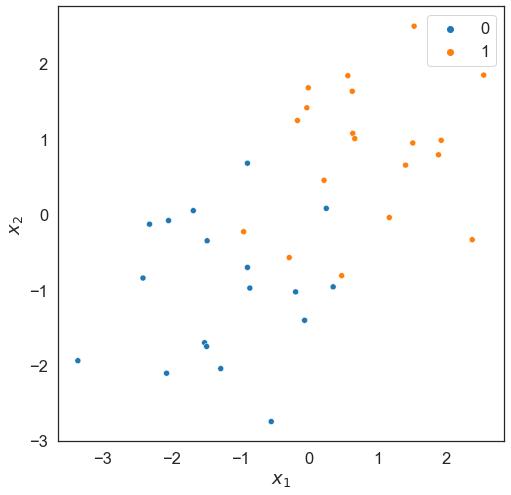

In [8]:
sns.set_style('white')
f = plt.figure(figsize=(8, 8))
sns.set_context("notebook", font_scale=1.5, rc={'lines.linewidth': 2.5})

sns.scatterplot(data=X_train, x=X_train[:, -2], y=X_train[:, -1], hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

##### Learning model parameters

In [9]:
perceptron_obj = Perceptron()
perceptron_obj.train(X_train, y_train)

Weight vector : [ 0.004      -0.00011203  0.00229835]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [0.002      0.00302479 0.0013778 ]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [ 0.002      -0.00025723 -0.00028898]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [0.002      0.00248022 0.00078821]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [0.         0.00156845 0.00116509]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [0.         0.00084163 0.00184825]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [0.         0.00161196 0.00086225]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [0.002      0.00114213 0.00296545]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [0.         0.0007

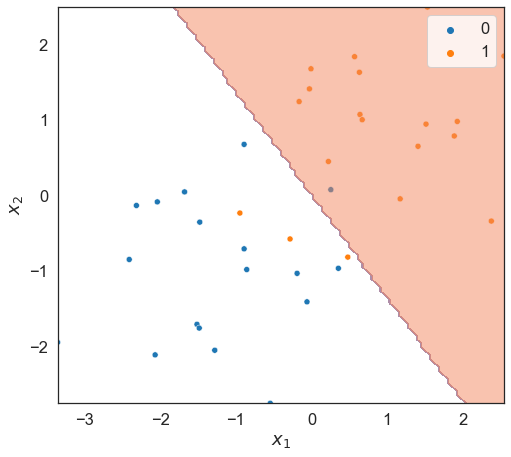

In [10]:
visualize_model(X_train, y_train, perceptron_obj)

In [11]:
perceptron_obj.errors_all

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

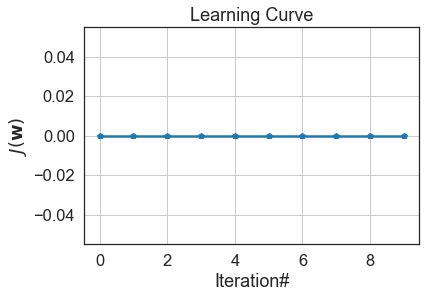

In [12]:
plt.plot(np.arange(len(perceptron_obj.errors_all)),perceptron_obj.errors_all, 'p-')
plt.grid()
plt.xlabel('Iteration#')
plt.ylabel('$J(\mathbf{w})$')
plt.title("Learning Curve")
plt.show()

#### DEMO 2: *Linear non-separable binary classification*

In [13]:
X_train, X_test, y_train, y_test = preprocess()

print('Shape of training feature-matrix:', X_train.shape)
print('Shape of label-vector', y_train.shape)

print("\nShape of test feature-matrix:", X_test.shape)
print("Shape of test label-vector:", y_test.shape)


Shape of training feature-matrix: (37, 3)
Shape of label-vector (37,)

Shape of test feature-matrix: (13, 3)
Shape of test label-vector: (13,)


In [14]:
# create_toy_data(factor=0.5)
X, y = create_toy_data()
X_poly = polynomial_transform(X, degree=1)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y)

perceptron_obj = Perceptron()
perceptron_obj.train(X_train, y_train, lr=1)

Weight vector : [2.         0.87722756 2.12596572]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [4.         5.18161026 0.32948243]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [4.         3.87541666 2.92963291]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [2.         0.69378776 2.53024392]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [4.         4.99817046 0.73376063]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [0.         2.70011294 0.24889732]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [2.         1.41837302 1.26382536]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [4.         4.15241691 0.56210317]
Loss / J(w): 0
-----------------------------------------------------
Weight vector : [4.         4.04142436 0

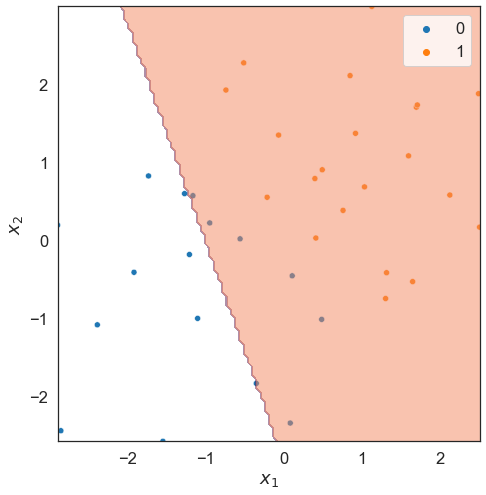

In [15]:
visualize_model(X_train, y_train, perceptron_obj, degree=1)

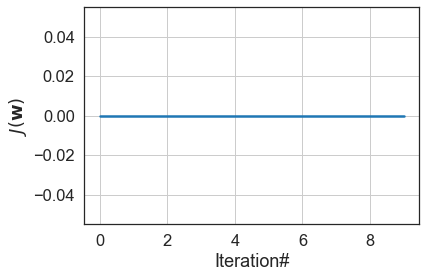

In [16]:
plt.plot(np.arange(len(perceptron_obj.errors_all)),
         perceptron_obj.errors_all)
plt.xlabel('Iteration#')
plt.ylabel("$J (\mathbf {w})$")
plt.grid()
plt.show()